## Load Data from Numpy Files ||  Normalise Data

In [15]:
# import tensorflow as tf
# import os
# import numpy as np
# from tensorflow.keras import layers, models

In [19]:
# def normalize_image(image):
#     return (image - np.min(image)) / (np.max(image) - np.min(image))

# def load_and_preprocess_image(file_path):
#     image = np.load(file_path)
#     if image.shape == (99, 450):
#         image = normalize_image(image)
#         image = image.reshape(99, 450, 1)  # Ensure the image has the correct shape
#         return image

# def data_generator(folder_path, batch_size):
#     file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
#     while True:
#         np.random.shuffle(file_list)
#         for i in range(0, len(file_list), batch_size):
#             batch_files = file_list[i:i + batch_size]
#             batch_data = np.array([load_and_preprocess_image(f) for f in batch_files])
#             yield batch_data, batch_data

# folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
# batch_size = 16
# train_data_gen = data_generator(folder_path, batch_size)
# val_data_gen = data_generator(folder_path, batch_size)

In [20]:
import gc
gc.collect()

1113

## Convolutional Autoencoder

In [24]:
# def build_autoencoder(input_shape, latent_dim):
#     # Encoder
#     encoder_input = tf.keras.Input(shape=input_shape)
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
#     shape_before_flattening = tf.keras.backend.int_shape(x)
#     x = layers.Flatten()(x)
#     encoder_output = layers.Dense(latent_dim, activation='relu')(x)
    
#     encoder = models.Model(encoder_input, encoder_output, name="encoder")
    
#     # Decoder
#     decoder_input = layers.Input(shape=(latent_dim,))
#     x = layers.Dense(shape_before_flattening[1] * shape_before_flattening[2] * shape_before_flattening[3], activation='relu')(decoder_input)
#     x = layers.Reshape((shape_before_flattening[1], shape_before_flattening[2], shape_before_flattening[3]))(x)
    
#     x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
#     decoder = models.Model(decoder_input, decoder_output, name="decoder")
    
#     # Autoencoder
#     autoencoder_input = encoder_input
#     autoencoder_output = decoder(encoder(autoencoder_input))
    
#     autoencoder = models.Model(autoencoder_input, autoencoder_output, name="autoencoder")
    
#     return autoencoder, encoder

In [25]:
# input_shape = (99, 450, 1)
# latent_dim = 1024

# autoencoder, encoder = build_autoencoder(input_shape, latent_dim)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 99, 450, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1024)           │    97,218,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 104, 456, 1)    │    97,459,329 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,677,377 (742.64 MB)

 Trainable params: 194,677,377 (742.64 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Autoencoder

In [ ]:
# train_size = len(os.listdir(folder_path))
# steps_per_epoch = train_size // batch_size

# # Train the model using generators
# history = autoencoder.fit(train_data_gen,
#                           steps_per_epoch=steps_per_epoch,
#                           epochs=50,
#                           validation_data=val_data_gen,
#                           validation_steps=steps_per_epoch)

# # Save the model
# autoencoder.save('autoencoder_model.h5')

## Plot Training

In [ ]:
# import matplotlib.pyplot as plt

# def plot_training_history(history):
#     # Extract loss values
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
    
#     # Create epochs array
#     epochs = range(1, len(loss) + 1)
    
#     # Plot training and validation loss
#     plt.figure(figsize=(12, 6))
#     plt.plot(epochs, loss, 'bo-', label='Training loss')
#     plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# plot_training_history(history)


## Use the Encoder for Latent Representation

In [ ]:
# latent_representations = encoder.predict(X_normalized)
# print(latent_representations.shape)  # Should be (N, 1024)

In [27]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Normalize image function
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Custom dataset
class CWTDataset(Dataset):
    def __init__(self, folder_path):
        self.file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        image = np.load(file_path)
        if image.shape != (99, 450):
            raise ValueError(f"Image at {file_path} does not have shape (99, 450).")
        image = normalize_image(image)
        image = image.reshape(1, 99, 450)  # Ensure the image has the correct shape (C, H, W)
        return torch.tensor(image, dtype=torch.float32)

folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
batch_size = 16

train_dataset = CWTDataset(folder_path)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [28]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, padding=0),  # Output: 32 x 49 x 225
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, padding=0),  # Output: 64 x 24 x 112
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, padding=1),  # Output: 128 x 12 x 56
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, padding=1)   # Output: 256 x 7 x 29
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 7 * 29, latent_dim)
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 256 * 7 * 29)
        self.unflatten = nn.Unflatten(1, (256, 7, 29))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 128 x 14 x 58
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 64 x 28 x 116
            nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 32 x 56 x 232
            nn.ConvTranspose2d(32, 1, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 1 x 112 x 464
            nn.Conv2d(1, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(99, 450))  # Crop to (99, 450)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.unflatten(x)
        x = self.decoder(x)
        return x

latent_dim = 1024
model = Autoencoder(latent_dim).cuda() if torch.cuda.is_available() else Autoencoder(latent_dim)
print(model)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=51968, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=51968, bias=True)
  (unflatten): Unflatten(dim=1, unflattened_size=(256, 7, 29))
  (decoder): Se

In [29]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 1
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs = batch.cuda() if torch.cuda.is_available() else batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Save the model
torch.save(model.state_dict(), 'autoencoder_model.pth')

KeyboardInterrupt: 

In [ ]:
# Plot training history
def plot_training_history(train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(train_losses)

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Normalize image function
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Custom dataset
class CWTDataset(Dataset):
    def __init__(self, folder_path):
        self.file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        image = np.load(file_path)
        if image.shape != (99, 450):
            raise ValueError(f"Image at {file_path} does not have shape (99, 450).")
        image = normalize_image(image)
        image = image.reshape(1, 99, 450)  # Ensure the image has the correct shape (C, H, W)
        return torch.tensor(image, dtype=torch.float32)

folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
batch_size = 16

train_dataset = CWTDataset(folder_path)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 16 x 49 x 225
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 32 x 24 x 112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 64 x 12 x 56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)   # Output: 128 x 6 x 28
        )
        self.fc1 = nn.Linear(128 * 6 * 28, latent_dim)
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 128 * 6 * 28)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 64 x 12 x 56
            nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 32 x 24 x 112
            nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 16 x 48 x 224
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(99, 450))  # Crop to (99, 450)
        )

    def forward(self, x):
        x = self.encoder(x)
        #print("Encoder Out", x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        #print("FC1", x.shape)
        x = self.fc2(x)
        #print("FC2", x.shape)
        x = x.view(x.size(0), 128, 6, 28)
        x = self.decoder(x)
        #print("decoder out", x.shape)
        return x

latent_dim = 1024
model = Autoencoder(latent_dim).cuda() if torch.cuda.is_available() else Autoencoder(latent_dim)
print(model)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 50
train_losses = []

print("Starting Training...")
for epoch in range(num_epochs):
    print("Epoch", epoch)
    model.train()
    running_loss = 0.0
    for batch_idx, batch in enumerate(train_loader):
        inputs = batch.cuda() if torch.cuda.is_available() else batch
        optimizer.zero_grad()
        outputs = model(inputs)
        #print("outptu", outputs.shape)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        print("Running Loss", running_loss)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training complete!")

# Save the model
model_path = 'autoencoder_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Plot training history
def plot_training_history(train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(train_losses)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=21504, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=21504, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()


KeyboardInterrupt: 

In [22]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Normalize image function
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Custom dataset
class CWTDataset(Dataset):
    def __init__(self, folder_path):
        self.file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        image = np.load(file_path)
        if image.shape != (99, 450):
            raise ValueError(f"Image at {file_path} does not have shape (99, 450).")
        image = normalize_image(image)
        image = image.reshape(1, 99, 450)  # Ensure the image has the correct shape (C, H, W)
        return torch.tensor(image, dtype=torch.float32)

folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
batch_size = 16

train_dataset = CWTDataset(folder_path)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 16 x 49 x 225
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 32 x 24 x 112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 64 x 12 x 56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)   # Output: 128 x 6 x 28
        )
        self.fc1 = nn.Linear(128 * 6 * 28, latent_dim)
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 128 * 6 * 28)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 64 x 12 x 56
            nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 32 x 24 x 112
            nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 16 x 48 x 224
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(99, 450))  # Resize to (99, 450)
        )

    def forward(self, x):
        x = self.encoder(x)
        print(x.shape, "1")
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        print(x.shape, "2")
        x = self.fc2(x)
        print(x.shape, "3")
        x = x.view(x.size(0), 128, 6, 28)
        x = self.decoder(x)
        return x

latent_dim = 1024
model = Autoencoder(latent_dim).cuda() if torch.cuda.is_available() else Autoencoder(latent_dim)
print(model)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 10
train_losses = []

print("Starting Training...")
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    model.train()
    running_loss = 0.0
    for batch_idx, batch in enumerate(train_loader):
        inputs = batch.cuda() if torch.cuda.is_available() else batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Print running loss in the same line
        print(f'\r  Batch [{batch_idx+1}/{len(train_loader)}] Loss: {loss.item()}', end='')

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f'\nEpoch {epoch+1}/{num_epochs}, Avg. Loss: {epoch_loss}')

    # Periodically print input and output images
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            sample_inputs = inputs.cpu().numpy()
            sample_outputs = outputs.cpu().numpy()

            fig, axes = plt.subplots(2, batch_size, figsize=(batch_size * 2, 4))
            for i in range(batch_size):
                axes[0, i].imshow(sample_inputs[i, 0, :, :], cmap='gray')
                axes[0, i].axis('off')
                axes[1, i].imshow(sample_outputs[i, 0, :, :], cmap='gray')
                axes[1, i].axis('off')
            plt.suptitle(f'Epoch {epoch+1}')
            plt.show()

print("Training complete!")


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=21504, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=21504, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()


KeyboardInterrupt: 

Model saved to autoencoder_model.pth


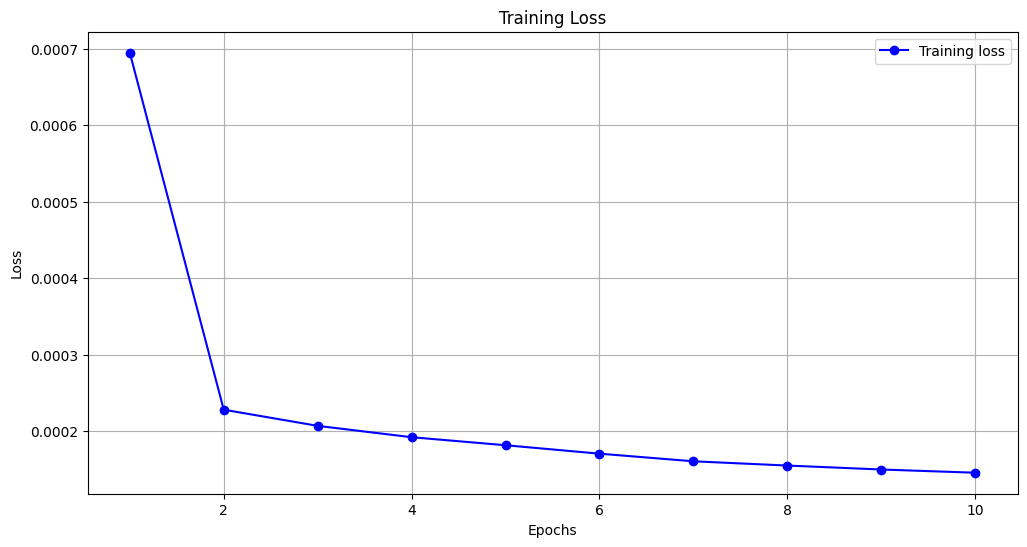

In [2]:
# Save the model
model_path = 'autoencoder_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Plot training history
def plot_training_history(train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(train_losses)

Model loaded from autoencoder_model.pth
Testing model on a few samples...


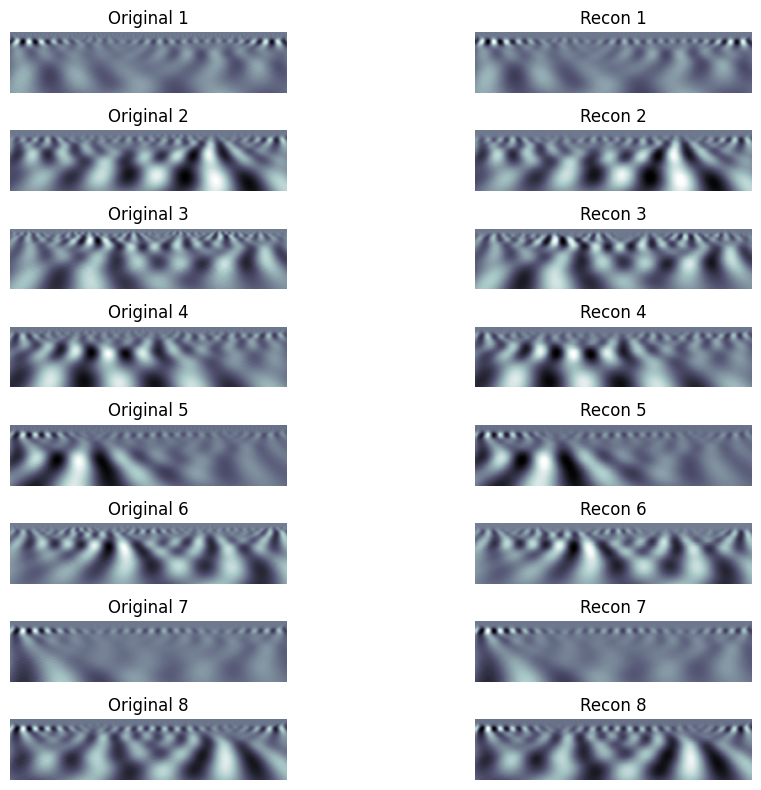

Testing complete!


In [21]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Normalize image function
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Custom dataset
class CWTDataset(Dataset):
    def __init__(self, folder_path):
        self.file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        image = np.load(file_path)
        if image.shape != (99, 450):
            raise ValueError(f"Image at {file_path} does not have shape (99, 450).")
        image = normalize_image(image)
        image = image.reshape(1, 99, 450)  # Ensure the image has the correct shape (C, H, W)
        return torch.tensor(image, dtype=torch.float32)

folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
batch_size = 8

test_dataset = CWTDataset(folder_path)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 16 x 49 x 225
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 32 x 24 x 112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 64 x 12 x 56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)   # Output: 128 x 6 x 28
        )
        self.fc1 = nn.Linear(128 * 6 * 28, latent_dim)
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 128 * 6 * 28)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 64 x 12 x 56
            nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 32 x 24 x 112
            nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 16 x 48 x 224
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(99, 450))  # Resize to (99, 450)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        print(x.shape)
        x = x.view(x.size(0), 128, 6, 28)
        x = self.decoder(x)
        return x

latent_dim = 1024
model = Autoencoder(latent_dim).cuda() if torch.cuda.is_available() else Autoencoder(latent_dim)

# Load the trained model checkpoint
model_path = 'autoencoder_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
print(f"Model loaded from {model_path}")



print("Testing model on a few samples...")
with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        inputs = batch.cuda() if torch.cuda.is_available() else batch
        outputs = model1(inputs)
        sample_inputs = inputs.cpu().numpy()
        sample_outputs = outputs.cpu().numpy()

        fig, axes = plt.subplots(batch_size, 2, figsize=(10, batch_size))
        for i in range(batch_size):
            axes[i, 0].imshow(sample_inputs[i, 0, :, :], cmap='bone')
            axes[i, 0].set_title(f'Original {i + 1}')
            axes[i, 0].axis('off')

            axes[i, 1].imshow(sample_outputs[i, 0, :, :], cmap='bone')
            axes[i, 1].set_title(f'Recon {i + 1}')
            axes[i, 1].axis('off')

        plt.tight_layout()
        plt.show()

        # Stop after one batch for demonstration purposes
        break

print("Testing complete!")

Model loaded from autoencoder_model.pth


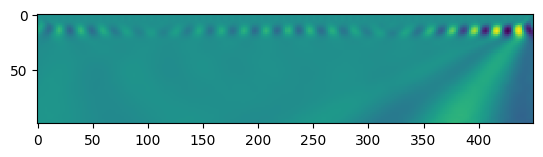

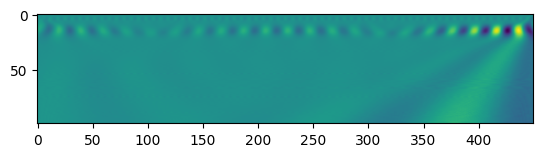

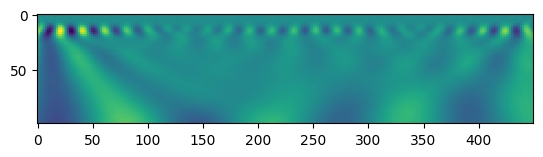

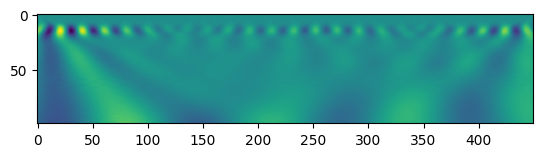

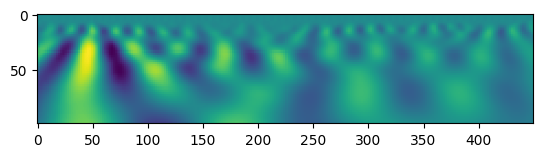

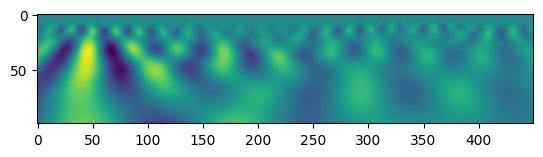

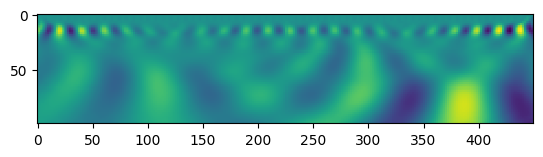

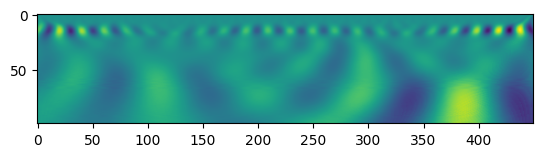

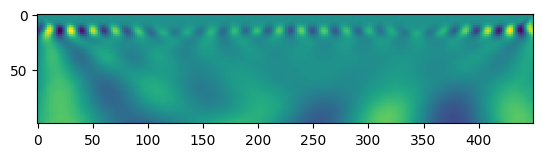

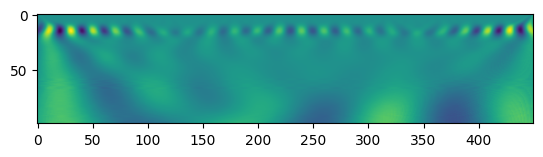

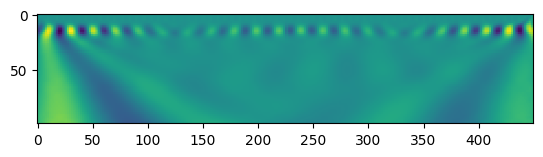

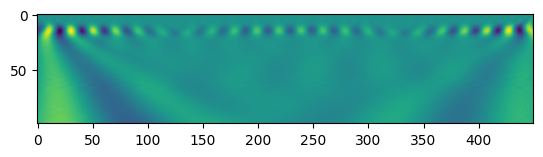

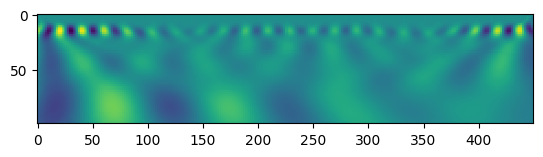

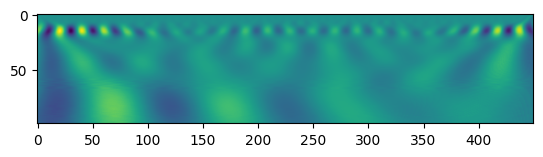

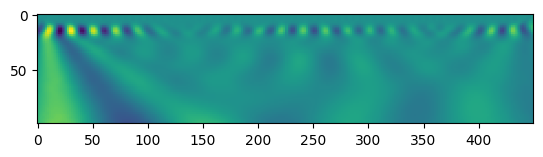

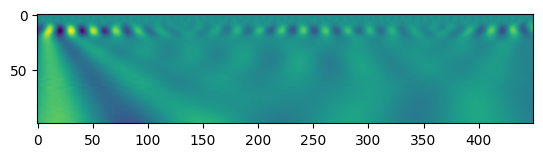

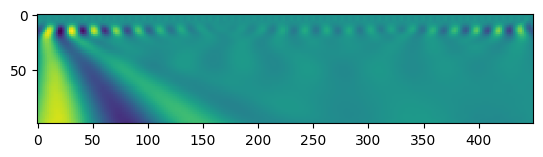

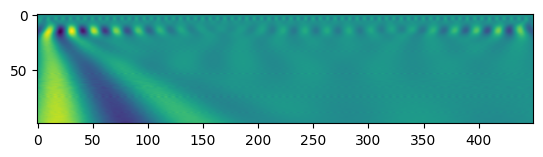

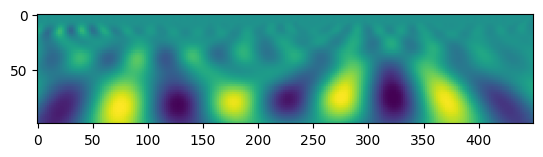

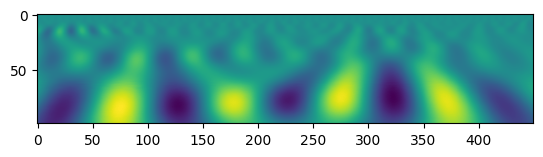

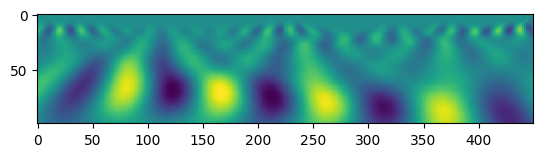

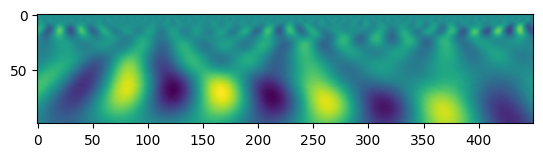



Representations saved successfully!


In [49]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Normalize image function
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Custom dataset
class CWTDataset(Dataset):
    def __init__(self, folder_path):
        self.file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        image = np.load(file_path)
        if image.shape != (99, 450):
            raise ValueError(f"Image at {file_path} does not have shape (99, 450).")
        image = normalize_image(image)
        image = image.reshape(1, 99, 450)  # Ensure the image has the correct shape (C, H, W)
        return torch.tensor(image, dtype=torch.float32), file_path

folder_path = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
batch_size = 16

dataset = CWTDataset(folder_path)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 16 x 49 x 225
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 32 x 24 x 112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 64 x 12 x 56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)   # Output: 128 x 6 x 28
        )
        self.fc1 = nn.Linear(128 * 6 * 28, latent_dim)
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 128 * 6 * 28)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 64 x 12 x 56
            nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 32 x 24 x 112
            nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),  # Output: 16 x 48 x 224
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(99, 450))  # Resize to (99, 450)
        )

    def encode(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    def decode(self, x):
        x = self.fc2(x)
        x = x.view(x.size(0), 128, 6, 28)
        x = self.decoder(x)
        return x
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = x.view(x.size(0), 128, 6, 28)
        x = self.decoder(x)
        return x

    
# Initialize the model
latent_dim = 1024
model = Autoencoder(latent_dim).cuda() if torch.cuda.is_available() else Autoencoder(latent_dim)

# Load the trained model checkpoint
model_path = 'autoencoder_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
print(f"Model loaded from {model_path}")

# Create the folder for saving representations
output_folder = 'latent_representations'
os.makedirs(output_folder, exist_ok=True)

count = {str(i):0 for i in range(len(os.listdir("/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices")))}

# Save the representations
for batch_idx, (inputs, file_paths) in enumerate(data_loader):
    inputs = inputs.cuda() if torch.cuda.is_available() else inputs
    representations = model.encode(inputs)  # Encode the inputs to get representations
    latent = representations.detach().cpu().numpy()
    for representation, file_path in zip(latent, file_paths):
        eeg_number = file_path.split('/')[-1].split('_')[1]  # Extract eeg number from file name
        count[str(eeg_number)] +=1
        np.save(os.path.join(output_folder, f"eeg_{eeg_number}_{count[str(eeg_number)]}_cwt.npy"), representation)
    
    if batch_idx%500 == 0:
        out = model.decode(representations)
        plt.imshow(out[0][0,:,:].detach().cpu().numpy())
        plt.show()
        plt.imshow(inputs[0][0,:,:].detach().cpu().numpy())
        plt.show()
        print()
        print()
print("Representations saved successfully!")


In [29]:
test = np.load("/kaggle/working/latent_representations/4104_cwt.npy")
print(test.shape)

(1024,)


In [50]:
len(os.listdir("/kaggle/working/latent_representations"))

83755

In [48]:
!rm -r "/kaggle/working/latent_representations"

In [52]:
%pwd

'/kaggle/working'

In [ ]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/latent_representations')

In [ ]:
!zip -r file.zip /kaggle/working